### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [218]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [128]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

---
### A1: Most Frequent Observation is "**<1H OCEAN**" with 9136 values
---


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.


In [220]:
# Splitting for train, test & validation sets
dftrainfull, dftest = train_test_split(df, test_size=0.2, random_state=42)
dftrain, dfval = train_test_split(dftrainfull, test_size=0.25, random_state=42)

dftrain = dftrain.reset_index(drop=True)
dfval = dfval.reset_index(drop=True)
dftest = dftest.reset_index(drop=True)
dftrainfull = dftrainfull.reset_index(drop=True)

yval = np.log1p(dfval.median_house_value.values)
ytest = np.log1p(dftest.median_house_value.values)
ytrain = np.log1p(dftrain.median_house_value.values)
ytrainfull = np.log1p(dftrainfull.median_house_value.values)

del dfval['median_house_value']
del dftest['median_house_value']
del dftrain['median_house_value']
del dftrainfull['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`


In [9]:
# Unselecting ocean_proximity

df[df.columns.difference(['ocean_proximity'])].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bedrooms_per_room         20640 non-null  float64
 1   households                20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   latitude                  20640 non-null  float64
 4   longitude                 20640 non-null  float64
 5   median_house_value        20640 non-null  float64
 6   median_income             20640 non-null  float64
 7   population                20640 non-null  float64
 8   population_per_household  20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  total_bedrooms            20640 non-null  float64
 11  total_rooms               20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


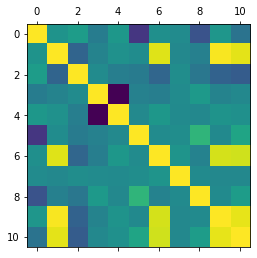

In [247]:
plt.matshow(dftrainfull[dftrainfull.columns.difference(['ocean_proximity'])].corr())
plt.show()

In [248]:
dftrainfull[dftrainfull.columns.difference(['ocean_proximity'])].corr()

,bedrooms_per_room,households,housing_median_age,latitude,longitude,median_income,population,population_per_household,rooms_per_household,total_bedrooms,total_rooms
bedrooms_per_room,1.000000,0.064185,0.135495,-0.118938,0.097280,-0.616669,0.035134,0.003938,-0.435169,0.084149,-0.189316
households,0.064185,1.000000,-0.302796,-0.064061,0.049306,0.012776,0.907452,-0.027656,-0.083062,0.980255,0.920482
housing_median_age,0.135495,-0.302796,1.000000,0.005296,-0.101818,-0.121711,-0.292283,0.016245,-0.160892,-0.320624,-0.360922
latitude,-0.118938,-0.064061,0.005296,1.000000,-0.924485,-0.076571,-0.102499,0.005837,0.110695,-0.059998,-0.029224
longitude,0.097280,0.049306,-0.101818,-0.924485,1.000000,-0.017040,0.094276,-0.000598,-0.029339,0.063064,0.038676
median_income,-0.616669,0.012776,-0.121711,-0.076571,-0.017040,1.000000,0.004122,0.022061,0.336013,-0.009141,0.198268
population,0.035134,0.907452,-0.292283,-0.102499,0.094276,0.004122,1.000000,0.072330,-0.073733,0.878932,0.857936
population_per_household,0.003938,-0.027656,0.016245,0.005837,-0.000598,0.022061,0.072330,1.000000,-0.004922,-0.028536,-0.024991
rooms_per_household,-0.435169,-0.083062,-0.160892,0.110695,-0.029339,0.336013,-0.073733,-0.004922,1.000000,-0.001659,0.136090
total_bedrooms,0.084149,0.980255,-0.320624,-0.059998,0.063064,-0.009141,0.878932,-0.028536,-0.001659,1.000000,0.930489


### total_bedrooms and households -> 0.966507
### total_bedrooms and total_rooms -> 0.920196
### population and households -> 0.907222
### population_per_household and total_rooms -> -0.024581
---
### A2: total_bedrooms and households has the highest correlation
---

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.


In [221]:
ytrain[ytrain<= ytrain.mean()] = 0
ytrain[ytrain != 0] = 1
ytrain = ytrain.astype(int)

yval[yval<= yval.mean()]
yval[yval != 0] = 1
yval = yval.astype(int)

ytrainfull[ytrainfull<= ytrainfull.mean()] = 0
ytrainfull[ytrainfull != 0] = 1
ytrainfull = ytrainfull.astype(int)

# mean_value = ytrain.mean()
# x = ytrain
# x[x<=mean_value] = 0
# x[x!=0] = 1

# dftrain['above_average'] = x
# dftrain['above_average'] = dftrain['above_average'].astype(int)

# xv = yval
# xv[xv<=mean_value] = 0
# xv[xv!=0] = 1
# dfval['above_average'] = xv
# dfval['above_average'] = dfval['above_average'].astype(int)

In [210]:
ytrain.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.263
- 0.00001
- 0.101
- 0.15555

In [7]:
# Categorical variable = ocean_proximity
mutual_info_score(dftrain['ocean_proximity'], dftrain['above_average'])

0.0894741473432424

In [222]:
mutual_info_score(dftrainfull['ocean_proximity'], ytrainfull)

0.12793726271750094

---
### A3: Mutual information score: **0.09 ~ 0.1**
---

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [223]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [224]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

categorical = ['ocean_proximity']

In [225]:
dv = DictVectorizer(sparse=False)

print(dftrain.shape, dfval.shape)

train_dict = dftrain.to_dict(orient='records')
trainfull_dict = dftrainfull.to_dict(orient='records')
val_dict = dfval.to_dict(orient='records')

print(len(train_dict), len(val_dict))

Xval = dv.fit_transform(val_dict) 
Xtrain = dv.fit_transform(train_dict)
Xtrainfull = dv.fit_transform(trainfull_dict)

Xtrain.shape, Xval.shape, Xtrainfull.shape

(12384, 12) (4128, 12)
12384 4128


((12384, 16), (4128, 16), (16512, 16))

In [181]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [228]:
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [229]:
np.mean(model.predict(Xval) == yval)

0.5208333333333334

---
### A4: 52%
---

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **Note**: the difference doesn't have to be positive

In [235]:
dv = DictVectorizer(sparse=False)

for i in dftrain.columns:
    train_dict = dftrain.loc[:,dftrain.columns != i].to_dict(orient='records')
    val_dict = dfval.loc[:,dfval.columns != i].to_dict(orient='records')

    Xval = dv.fit_transform(val_dict) 
    Xtrain = dv.fit_transform(train_dict)
    
    model.fit(Xtrain, ytrain)
    err = np.mean(model.predict(Xval) == yval)
    print(f"Excluding {i}, Error: {round(err, 3)}, difference: {round(0.5208333333-err, 10)}")

Excluding latitude, Error: 0.523, difference: -0.0016957365
Excluding longitude, Error: 0.521, difference: -0.0004844962
Excluding housing_median_age, Error: 0.524, difference: -0.0029069768
Excluding total_rooms, Error: 0.52, difference: 0.0012112403
Excluding total_bedrooms, Error: 0.522, difference: -0.0014534884
Excluding population, Error: 0.523, difference: -0.0019379845
Excluding households, Error: 0.523, difference: -0.0026647287
Excluding median_income, Error: 0.573, difference: -0.0520833334
Excluding ocean_proximity, Error: 0.498, difference: 0.0225290697
Excluding rooms_per_household, Error: 0.52, difference: 0.0012112403
Excluding bedrooms_per_room, Error: 0.522, difference: -0.0007267442
Excluding population_per_household, Error: 0.521, difference: -0.0002422481


---
### A5: Model with total_rooms has least difference with original accuracy
---

In [193]:
pd.DataFrame(val_dict)['ocean_proximity'].value_counts()

<1H OCEAN     1869
INLAND        1272
NEAR OCEAN     528
NEAR BAY       457
ISLAND           2
Name: ocean_proximity, dtype: int64

In [238]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Splitting for train, test & validation sets
dftrainfull, dftest = train_test_split(df, test_size=0.2, random_state=42)
dftrain, dfval = train_test_split(dftrainfull, test_size=0.25, random_state=42)

dftrain = dftrain.reset_index(drop=True)
dfval = dfval.reset_index(drop=True)
dftest = dftest.reset_index(drop=True)
dftrainfull = dftrainfull.reset_index(drop=True)

yval = np.log1p(dfval.median_house_value.values)
ytest = np.log1p(dftest.median_house_value.values)
ytrain = np.log1p(dftrain.median_house_value.values)
ytrainfull = np.log1p(dftrainfull.median_house_value.values)

del dfval['median_house_value']
del dftest['median_house_value']
del dftrain['median_house_value']
del dftrainfull['median_house_value']


In [245]:
alphalist = [0, 0.01, 0.1, 1, 10]

for a in alphalist:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(Xtrain, ytrain)
    rmse = mean_squared_error(yval, model.predict(Xval))
    print(f"alpha: {a}, rmse: {round(rmse, 3)}")

alpha: 0, rmse: 0.275
alpha: 0.01, rmse: 0.275
alpha: 0.1, rmse: 0.275
alpha: 1, rmse: 0.275
alpha: 10, rmse: 0.275


---
### A6: All alpha have equal RMSE -> a = 0
---